In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tiantan.csv to Tiantan.csv


In [ ]:
data=read_csv("Tiantan.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Tiantan.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,,
2013-03-01 00:00:00,1,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,2,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,3,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,4,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,5,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,35061,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,35062,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.isnull().sum()

PM2.5     677
PM10      597
SO2      1118
NO2       744
CO       1126
O3        843
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         78
WSPM       14
dtype: int64

In [ ]:
dataset=dataset.fillna(method="pad")

In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.255892,106.657004,14.475397,53.237608,1308.279318,56.464766,13.668746,1012.551858,2.445117,0.063983,1.860712
std,81.130568,90.433491,20.508332,31.999587,1184.456071,60.844059,11.460066,10.266719,13.812242,0.786059,1.280429
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,58.000000,85.000000,7.000000,47.000000,900.000000,41.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,114.000000,144.000000,17.000000,71.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

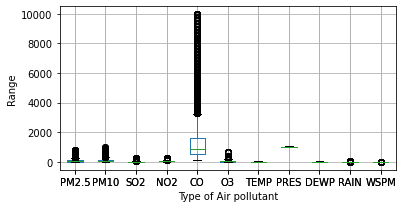

In [ ]:
#Box plot
plt.rcParams["figure.figsize"] = [5.7, 3]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./Tiantansobaric.jpg', dpi=400)
plt.show()

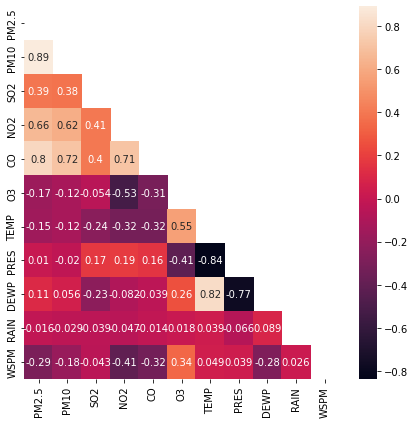

In [ ]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Tiantanheat.jpg', dpi=400) 
# displaying heatmap
plt.show()

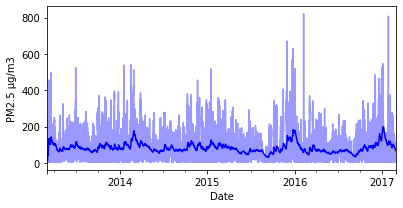

In [ ]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./Tiantan.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
values

array([[ 6. ,  6. ,  4. , ...,  0. ,  6. ,  5.7],
       [ 6. , 29. ,  5. , ...,  0. ,  7. ,  3.9],
       [ 6. ,  6. ,  4. , ...,  0. ,  6. ,  5.3],
       ...,
       [18. , 32. ,  4. , ...,  0. ,  7. ,  1.1],
       [15. , 42. ,  5. , ...,  0. ,  6. ,  1.2],
       [15. , 50. ,  5. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
#Lstm model build
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 50))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
#Train the model
lstm_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=2)

Epoch 1/100
411/411 - 15s - loss: 0.0026 - val_loss: 0.0015 - 15s/epoch - 36ms/step
Epoch 2/100
411/411 - 6s - loss: 0.0013 - val_loss: 9.2441e-04 - 6s/epoch - 13ms/step
Epoch 3/100
411/411 - 6s - loss: 9.7295e-04 - val_loss: 7.5020e-04 - 6s/epoch - 14ms/step
Epoch 4/100
411/411 - 7s - loss: 7.9621e-04 - val_loss: 7.6614e-04 - 7s/epoch - 17ms/step
Epoch 5/100
411/411 - 6s - loss: 7.3888e-04 - val_loss: 6.2604e-04 - 6s/epoch - 14ms/step
Epoch 6/100
411/411 - 6s - loss: 6.9343e-04 - val_loss: 7.8923e-04 - 6s/epoch - 16ms/step
Epoch 7/100
411/411 - 8s - loss: 6.5020e-04 - val_loss: 5.9313e-04 - 8s/epoch - 18ms/step
Epoch 8/100
411/411 - 5s - loss: 6.4892e-04 - val_loss: 7.2272e-04 - 5s/epoch - 13ms/step
Epoch 9/100
411/411 - 6s - loss: 6.6348e-04 - val_loss: 6.7082e-04 - 6s/epoch - 13ms/step
Epoch 10/100
411/411 - 6s - loss: 6.4512e-04 - val_loss: 5.9070e-04 - 6s/epoch - 14ms/step
Epoch 11/100
411/411 - 6s - loss: 6.1667e-04 - val_loss: 5.7291e-04 - 6s/epoch - 14ms/step
Epoch 12/100
411/4

In [ ]:
from keras.models import load_model
model.save('AirPollutionLSTM.h5')

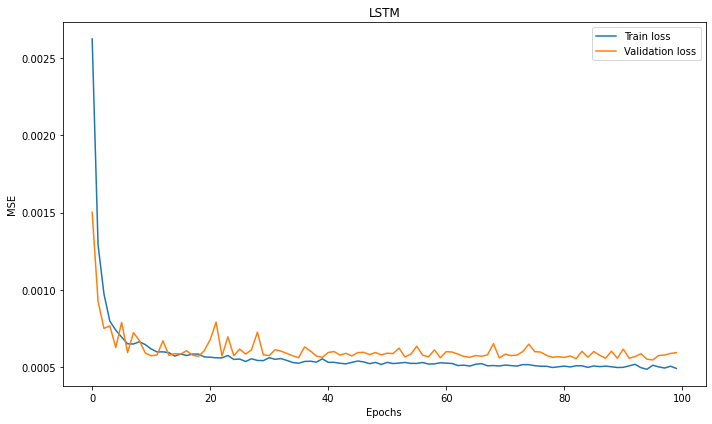

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.title("LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 1s 8ms/step
RMSE at 40 = 10.396214
RMAE at 40 = 3.044967
MAPE at 40 = 1.3367949
R2 at 40 = 0.48873512197990343
2/2 [==============================] - 0s 7ms/step
RMSE at 45 = 10.918309
RMAE at 45 = 3.0796342
MAPE at 45 = 1.2037163
R2 at 45 = 0.7969775295504932
2/2 [==============================] - 0s 7ms/step
RMSE at 50 = 12.032286
RMAE at 50 = 3.166351
MAPE at 50 = 1.0995574
R2 at 50 = 0.8702915497371834
2/2 [==============================] - 0s 8ms/step
RMSE at 55 = 11.890296
RMAE at 55 = 3.1617644
MAPE at 55 = 1.0104808
R2 at 55 = 0.8816574120769498
2/2 [==============================] - 0s 9ms/step
RMSE at 60 = 12.197197
RMAE at 60 = 3.1648726
MAPE at 60 = 0.934832
R2 at 60 = 0.889419028862894
3/3 [==============================] - 0s 6ms/step
RMSE at 65 = 12.322804
RMAE at 65 = 3.1879277
MAPE at 65 = 0.8711495
R2 at 65 = 0.9008369171558288
3/3 [==============================] - 0s 6ms/step
RMSE at 70 = 13.56284
RMAE at 70 = 3.3301415
MAPE at

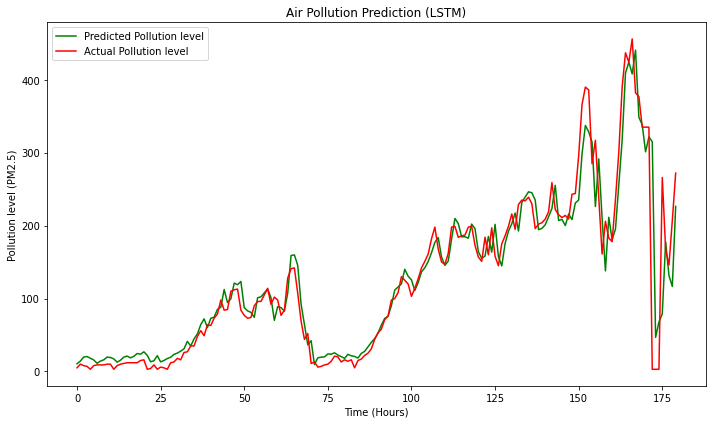

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (LSTM)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graph_LSTM.png')

In [ ]:
savetxt('Predict_LSTM.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_LSTM.csv', Y_test, delimiter=',')